In [1]:
pip install psycopg2 pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 42.4 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for psycopg2: filename=psycopg2-2.9.9-cp311-cp311-macosx_10_9_x86_64.whl size=133904 sha256=93427945d6ce215516c2262d7f9c0fa7faa7279f54bae4d7fba0aabaa5fd3ab8
  Stored in directory: /Users/katka/Library/Caches/pip/wheels/ab/34/b9/78ebef1b3220b4840ee482461e738566c3c9165d2b5c914f51
Successfully built psycopg2
Note: you may need to restart the kernel to use updated packages.


In [6]:
import psycopg2
import pandas as pd 
conn = psycopg2.connect(
    database="orderslms",
    user="katka",
    password="123",
    host="localhost",
)


In [26]:
query = "SELECT * FROM customers;"
df = pd.read_sql_query(query, conn)


/var/folders/6z/ncy_wsd14d118qw59ml4rfb00000gn/T/ipykernel_55286/3886728129.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [27]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [20]:
!pip install tabulate reportlab
from tabulate import tabulate
from reportlab.pdfgen import canvas



# Convert DataFrame to a formatted string using tabulate
table_str = tabulate(df, headers='keys', tablefmt='fancy_grid')

# Save the formatted string to a PDF file using reportlab
pdf_filename = 'output.pdf'
with open(pdf_filename, 'wb') as pdf_file:
    pdf = canvas.Canvas(pdf_file)
    pdf.drawString(100, 800, table_str.encode('utf-8'))  # Encode the string to bytes
    pdf.save()


    

In [21]:
csv_filename = 'output.csv'
df.to_csv(csv_filename, index=False)

In [23]:
!pip install tabula-py
import tabula

csv_filename = 'output.csv'
df2 = pd.read_csv(csv_filename)

# Convert DataFrame to a formatted string using tabulate
table_str = tabulate(df2, headers='keys', tablefmt='fancy_grid')

# Save the formatted string to a PDF file using reportlab
pdf_filename = 'output2.pdf'
with open(pdf_filename, 'wb') as pdf_file:
    pdf = canvas.Canvas(pdf_file)
    pdf.drawString(100, 800, table_str.encode('utf-8'))  # Encode the string to bytes
    pdf.save()

  Obtaining dependency information for tabula-py from https://files.pythonhosted.org/packages/d5/77/b34088cbb55ba59e1cc6512ab2ff3b7679102b7f7577982a96cbdcddb90c/tabula_py-2.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for distro from https://files.pythonhosted.org/packages/12/b3/231ffd4ab1fc9d679809f356cebee130ac7daa00d6d6f3206dd4fd137e9e/distro-1.9.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 202.2 kB/s eta 0:00:0000:0100:02


In [24]:
import pandas as pd
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle

# Read CSV file into a DataFrame
csv_filename = 'output.csv'
df3 = pd.read_csv(csv_filename)

# Convert DataFrame to a list of lists (2D array)
data = [df3.columns.tolist()] + df3.values.tolist()

# Create a PDF file
pdf_filename = 'output2.pdf'
doc = SimpleDocTemplate(pdf_filename, pagesize=letter)
table = Table(data)

# Define style for the table
style = TableStyle([('BACKGROUND', (0, 0), (-1, 0), '#77b5fe'),
                    ('TEXTCOLOR', (0, 0), (-1, 0), (1, 1, 1)),
                    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                    ('BACKGROUND', (0, 1), (-1, -1), '#f0f8ff'),
                    ('GRID', (0, 0), (-1, -1), 1, '#000000')])

# Apply the style to the table
table.setStyle(style)

# Build the PDF
elements = [table]
doc.build(elements)


In [29]:
df

,customernumber,customername,contactlastname,contactfirstname,phone,addressline1,addressline2,city,state,postalcode,country,salesrepemployeenumber,creditlimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000.0
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800.0
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.0
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200.0
4,124,Mini Gifts Distributors Ltd.,Nelson,Susan,4155551450,5677 Strong St.,None,San Rafael,CA,97562,USA,1165.0,210500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,487,Signal Collectibles Ltd.,Taylor,Sue,4155554312,2793 Furth Circle,None,Brisbane,CA,94217,USA,1165.0,60300.0
117,489,"Double Decker Gift Stores, Ltd",Smith,Thomas,(171) 555-7555,120 Hanover Sq.,None,London,None,WA1 1DP,UK,1501.0,43300.0
118,495,Diecast Collectables,Franco,Valarie,6175552555,6251 Ingle Ln.,None,Boston,MA,51003,USA,1188.0,85100.0
119,496,Kelly's Gift Shop,Snowden,Tony,+64 9 5555500,Arenales 1938 3'A',None,Auckland,None,None,New Zealand,1612.0,110000.0


In [30]:
import matplotlib.pyplot as plt


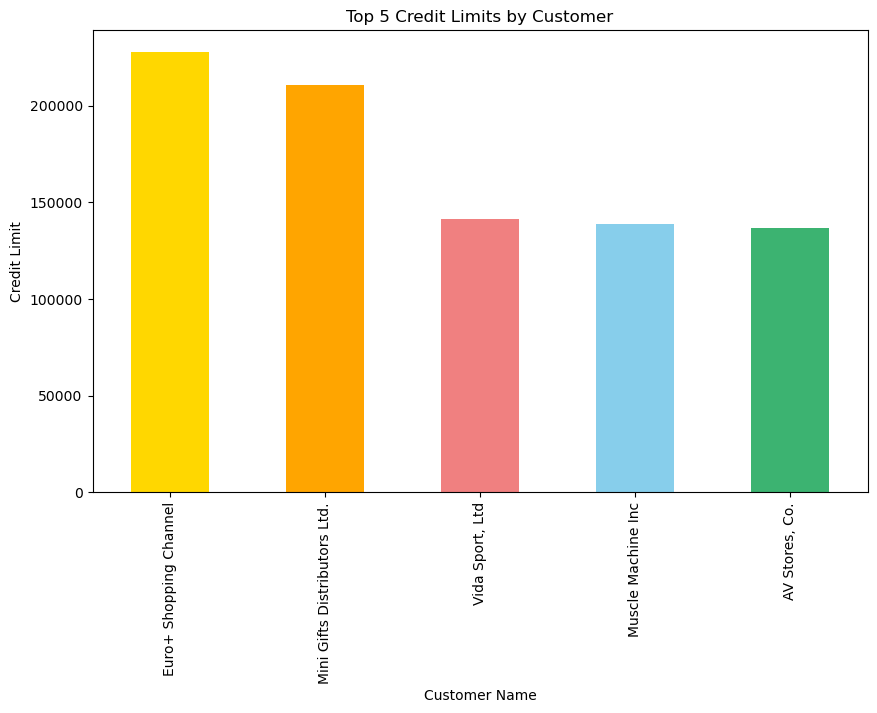

In [36]:
df_sorted = df.sort_values(by='creditlimit', ascending=False)

# Select the top 5 rows
top_5 = df_sorted.head(5)

# Define custom colors for each bar
colors = ['gold', 'orange', 'lightcoral', 'skyblue', 'mediumseagreen']

# Plot a bar plot for the top 5 credit limits with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
top_5.plot(kind='bar', x='customername', y='creditlimit', ax=ax, legend=False, color=colors)
ax.set_ylabel('Credit Limit')
ax.set_xlabel('Customer Name')
ax.set_title('Top 5 Credit Limits by Customer')

# Show the plot
plt.show()

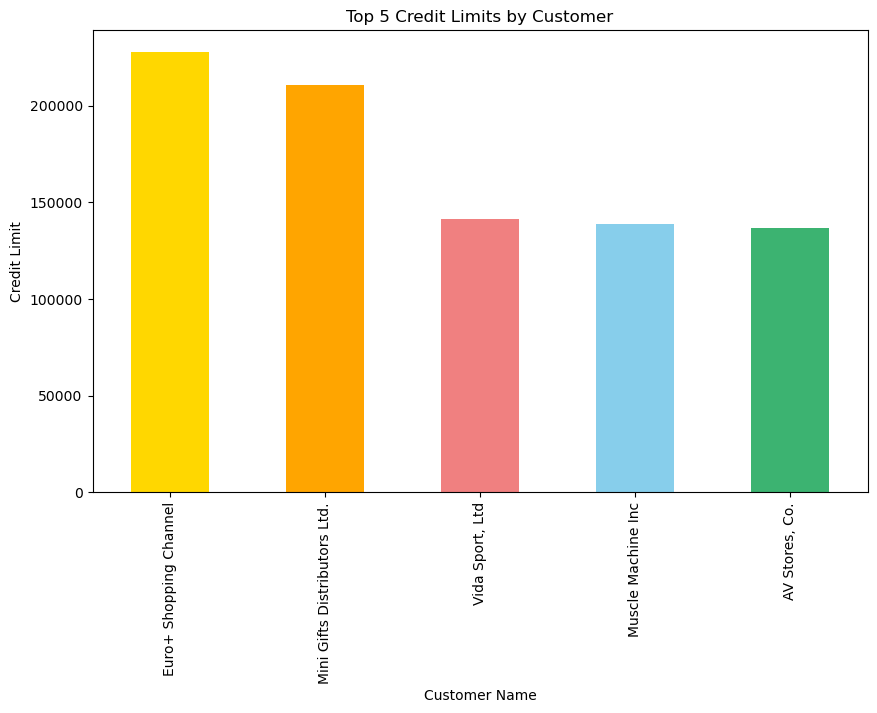

In [40]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

# Create a PDF document
pdf_filename = 'top_5_credit_limits_report.pdf'
pdf = canvas.Canvas(pdf_filename, pagesize=letter)

# Draw content on the PDF
pdf.drawString(100, 800, 'Top 5 Customers with Highest Credit Limits')

# Create the plot
df_sorted = df.sort_values(by='creditlimit', ascending=False)
top_5 = df_sorted.head(5)
colors = ['gold', 'orange', 'lightcoral', 'skyblue', 'mediumseagreen']

fig, ax = plt.subplots(figsize=(10, 6))
top_5.plot(kind='bar', x='customername', y='creditlimit', ax=ax, legend=False, color=colors)
ax.set_ylabel('Credit Limit')
ax.set_xlabel('Customer Name')
ax.set_title('Top 5 Credit Limits by Customer')

# Save the plot to a BytesIO object
image_stream = BytesIO()
plt.savefig(image_stream, format='png', bbox_inches='tight')
image_stream.seek(0)
  
# Convert BytesIO to a Pillow Image
image = Image.open(image_stream)

# Insert the plot into the PDF
pdf.drawInlineImage(image, 100, 600, width=400, height=200)

# Add data about the top 5 customers to the PDF
pdf.drawString(100, 550, 'Data about Top 5 Customers:')
for i, (_, row) in enumerate(top_5.iterrows(), 1):
    pdf.drawString(120, 530 - i * 20, f"{row['customername']}: Credit Limit - {row['creditlimit']}")

# Save and close the PDF
pdf.save()
